#                                       TRABALHO CONCLUSAO DE CURSO 
                                               
    


## PUC MINAS
## CIENCIA DE DADO 

## Aluno: Daniela Matta Machado

In [1]:

#Importe das bibliotecas e pacotes necessarios para o projeto

#forma a base para o trabalho de ciencia de dados
import numpy as np
import pandas as pd

import datetime

#Matplotlib usado nas visualizacoes:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
import pylab as pl
import seaborn as sns

#Algoritmo Kmeans e metricas
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from yellowbrick.cluster import KElbowVisualizer
from scipy.spatial.distance import cdist, pdist

#Para algoritmo DBSCAN
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons
%matplotlib inline

#Imports para algoritmo MeanShift
from sklearn.cluster import MeanShift, estimate_bandwidth
from itertools import cycle


from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap
from sklearn import metrics
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")
np.random.seed(42)
import warnings
warnings.filterwarnings("ignore")






In [2]:
# Conhecer a primeira planilha com os dados de venda janeiro 2019

VendasJan = pd.read_csv("Sales_January_2019.csv")
VendasJan.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"


In [3]:
#Consolidar todas as planilhas em um DataFrame unico

VendasFev = pd.read_csv("Sales_February_2019.csv")
VendasMarc = pd.read_csv("Sales_March_2019.csv.zip")
VendasAbri = pd.read_csv("Sales_April_2019.csv.zip")
VendasMai = pd.read_csv("Sales_May_2019.csv.zip")
VendasJun = pd.read_csv("Sales_June_2019.csv.zip")
VendasJul = pd.read_csv("Sales_July_2019.csv.zip")
VendasAgo = pd.read_csv("Sales_August_2019.csv")
VendasSet = pd.read_csv("Sales_September_2019.csv")
VendasOut = pd.read_csv("Sales_October_2019.csv.zip")
VendasNov = pd.read_csv("Sales_November_2019.csv.zip")
VendasDez = pd.read_csv("Sales_December_2019.csv.zip")

frames = [VendasJan, VendasFev, VendasMarc,VendasAbri,VendasMai,VendasJun, VendasJul, VendasAgo, VendasSet,VendasOut,VendasNov,VendasDez ]
VendasConsolidado = pd.concat(frames)
VendasConsolidado.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"


In [4]:
#Conhecer os dados importados
VendasConsolidado.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186850 entries, 0 to 25116
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 10.0+ MB


In [5]:
# Conhecer e trabalhar os dados missing
ValoresMissing = VendasConsolidado.isnull().sum()
ValoresMissing

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [6]:
VendasConsolidado = VendasConsolidado.dropna(how='all')
VendasConsolidado.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [7]:
#Descobrir os valores unicos
ValoresUnicos = VendasConsolidado.select_dtypes(['category', 'object']).columns
for uniq in ValoresUnicos:
    print('{} : {} valores unicos'.format(uniq, VendasConsolidado[uniq].nunique()))

Order ID : 178438 valores unicos
Product : 20 valores unicos
Quantity Ordered : 10 valores unicos
Price Each : 24 valores unicos
Order Date : 142396 valores unicos
Purchase Address : 140788 valores unicos


In [8]:
VendasConsolidado[VendasConsolidado.isna().any(axis=1)]
VendasConsolidado = VendasConsolidado[VendasConsolidado['Order Date'].str[0:2] != 'Or']
VendasConsolidado.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"


In [9]:
#Trabalhar os tipos dos dados em 'Quantidade Pedida' e 'Preco' . Transformar as unidades para int e float
VendasConsolidado['Qtd produto'] = VendasConsolidado['Quantity Ordered'].astype(str).astype(int)
VendasConsolidado['Preco unitario'] = VendasConsolidado['Price Each'].astype(float, errors = 'raise')

#Excluir colunas repetidas e coluna de ID
del VendasConsolidado['Quantity Ordered']
del VendasConsolidado['Price Each']

#Checar novamente a planilha 
VendasConsolidado.head()


,Order ID,Product,Order Date,Purchase Address,Qtd produto,Preco unitario
0,141234,iPhone,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",1,700.00
1,141235,Lightning Charging Cable,01/28/19 14:15,"185 Maple St, Portland, OR 97035",1,14.95
2,141236,Wired Headphones,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",2,11.99
3,141237,27in FHD Monitor,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",1,149.99
4,141238,Wired Headphones,01/25/19 11:59,"387 10th St, Austin, TX 73301",1,11.99


In [10]:
VendasConsolidado['ValorVenda'] = VendasConsolidado['Qtd produto'] * VendasConsolidado['Preco unitario']
VendasConsolidado['ValorVenda'].round(decimals=2)
VendasConsolidado.head()

,Order ID,Product,Order Date,Purchase Address,Qtd produto,Preco unitario,ValorVenda
0,141234,iPhone,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",1,700.00,700.00
1,141235,Lightning Charging Cable,01/28/19 14:15,"185 Maple St, Portland, OR 97035",1,14.95,14.95
2,141236,Wired Headphones,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",2,11.99,23.98
3,141237,27in FHD Monitor,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",1,149.99,149.99
4,141238,Wired Headphones,01/25/19 11:59,"387 10th St, Austin, TX 73301",1,11.99,11.99


In [11]:
#Separar a coluna 'Order date' em ano, mes e dia para melhor responder as perguntas do negocio

VendasConsolidado['Order Date'] = pd.to_datetime(VendasConsolidado['Order Date'])
VendasConsolidado['Ano'] =  VendasConsolidado['Order Date'].dt.year
VendasConsolidado['Mes'] = VendasConsolidado['Order Date'].dt.month
VendasConsolidado['Dia'] = VendasConsolidado['Order Date'].dt.day

VendasConsolidado.head()


,Order ID,Product,Order Date,Purchase Address,Qtd produto,Preco unitario,ValorVenda,Ano,Mes,Dia
0,141234,iPhone,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",1,700.00,700.00,2019,1,22
1,141235,Lightning Charging Cable,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",1,14.95,14.95,2019,1,28
2,141236,Wired Headphones,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",2,11.99,23.98,2019,1,17
3,141237,27in FHD Monitor,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",1,149.99,149.99,2019,1,5
4,141238,Wired Headphones,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",1,11.99,11.99,2019,1,25


In [12]:
VendasConsolidado['Cidade'] = VendasConsolidado['Purchase Address'].apply(lambda x: x.split(',')[1])
VendasConsolidado['Rua'] = VendasConsolidado['Purchase Address'].apply(lambda x: x.split(',')[0])
VendasConsolidado['Estado'] = VendasConsolidado['Purchase Address'].apply(lambda x: x.split()[-2])

VendasConsolidado.head()

,Order ID,Product,Order Date,Purchase Address,Qtd produto,Preco unitario,ValorVenda,Ano,Mes,Dia,Cidade,Rua,Estado
0,141234,iPhone,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",1,700.00,700.00,2019,1,22,Boston,944 Walnut St,MA
1,141235,Lightning Charging Cable,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",1,14.95,14.95,2019,1,28,Portland,185 Maple St,OR
2,141236,Wired Headphones,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",2,11.99,23.98,2019,1,17,San Francisco,538 Adams St,CA
3,141237,27in FHD Monitor,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",1,149.99,149.99,2019,1,5,Los Angeles,738 10th St,CA
4,141238,Wired Headphones,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",1,11.99,11.99,2019,1,25,Austin,387 10th St,TX


# Qual foi o melhor ano/mes que teve maior total de vendas?


In [13]:
QtdVendidaAno = VendasConsolidado[['Ano','ValorVenda']]
QtdVendidaAno.groupby(['Ano']).sum().astype('int64')

,ValorVenda
Ano,
2019,34483365
2020,8670


#O ano que teve melhor valor em vendas foi 2019 comparado com 2020 (34.483.365 milhoes dolares) 

In [14]:
MelhorMes = VendasConsolidado.groupby(['Mes']).sum().reset_index().astype('int64')
MelhorMes

,Mes,Qtd produto,Preco unitario,ValorVenda,Ano,Dia
0,1,10903,1811768,1822256,19602505,155814
1,2,13449,2188884,2202022,24177525,174408
2,3,17005,2791207,2807100,30593907,241774
3,4,20558,3367671,3390670,36905301,282960
4,5,18667,3135125,3152606,33446754,264875
5,6,15253,2562025,2577802,27365526,209880
6,7,16072,2632539,2647775,28857567,227910
7,8,13448,2230345,2244467,24149259,192315
8,9,13109,2084992,2097560,23462799,180101
9,10,22703,3715554,3736726,40949358,326141


Text(0.5, 1.0, 'Quantidade produtos vendidos no mes')

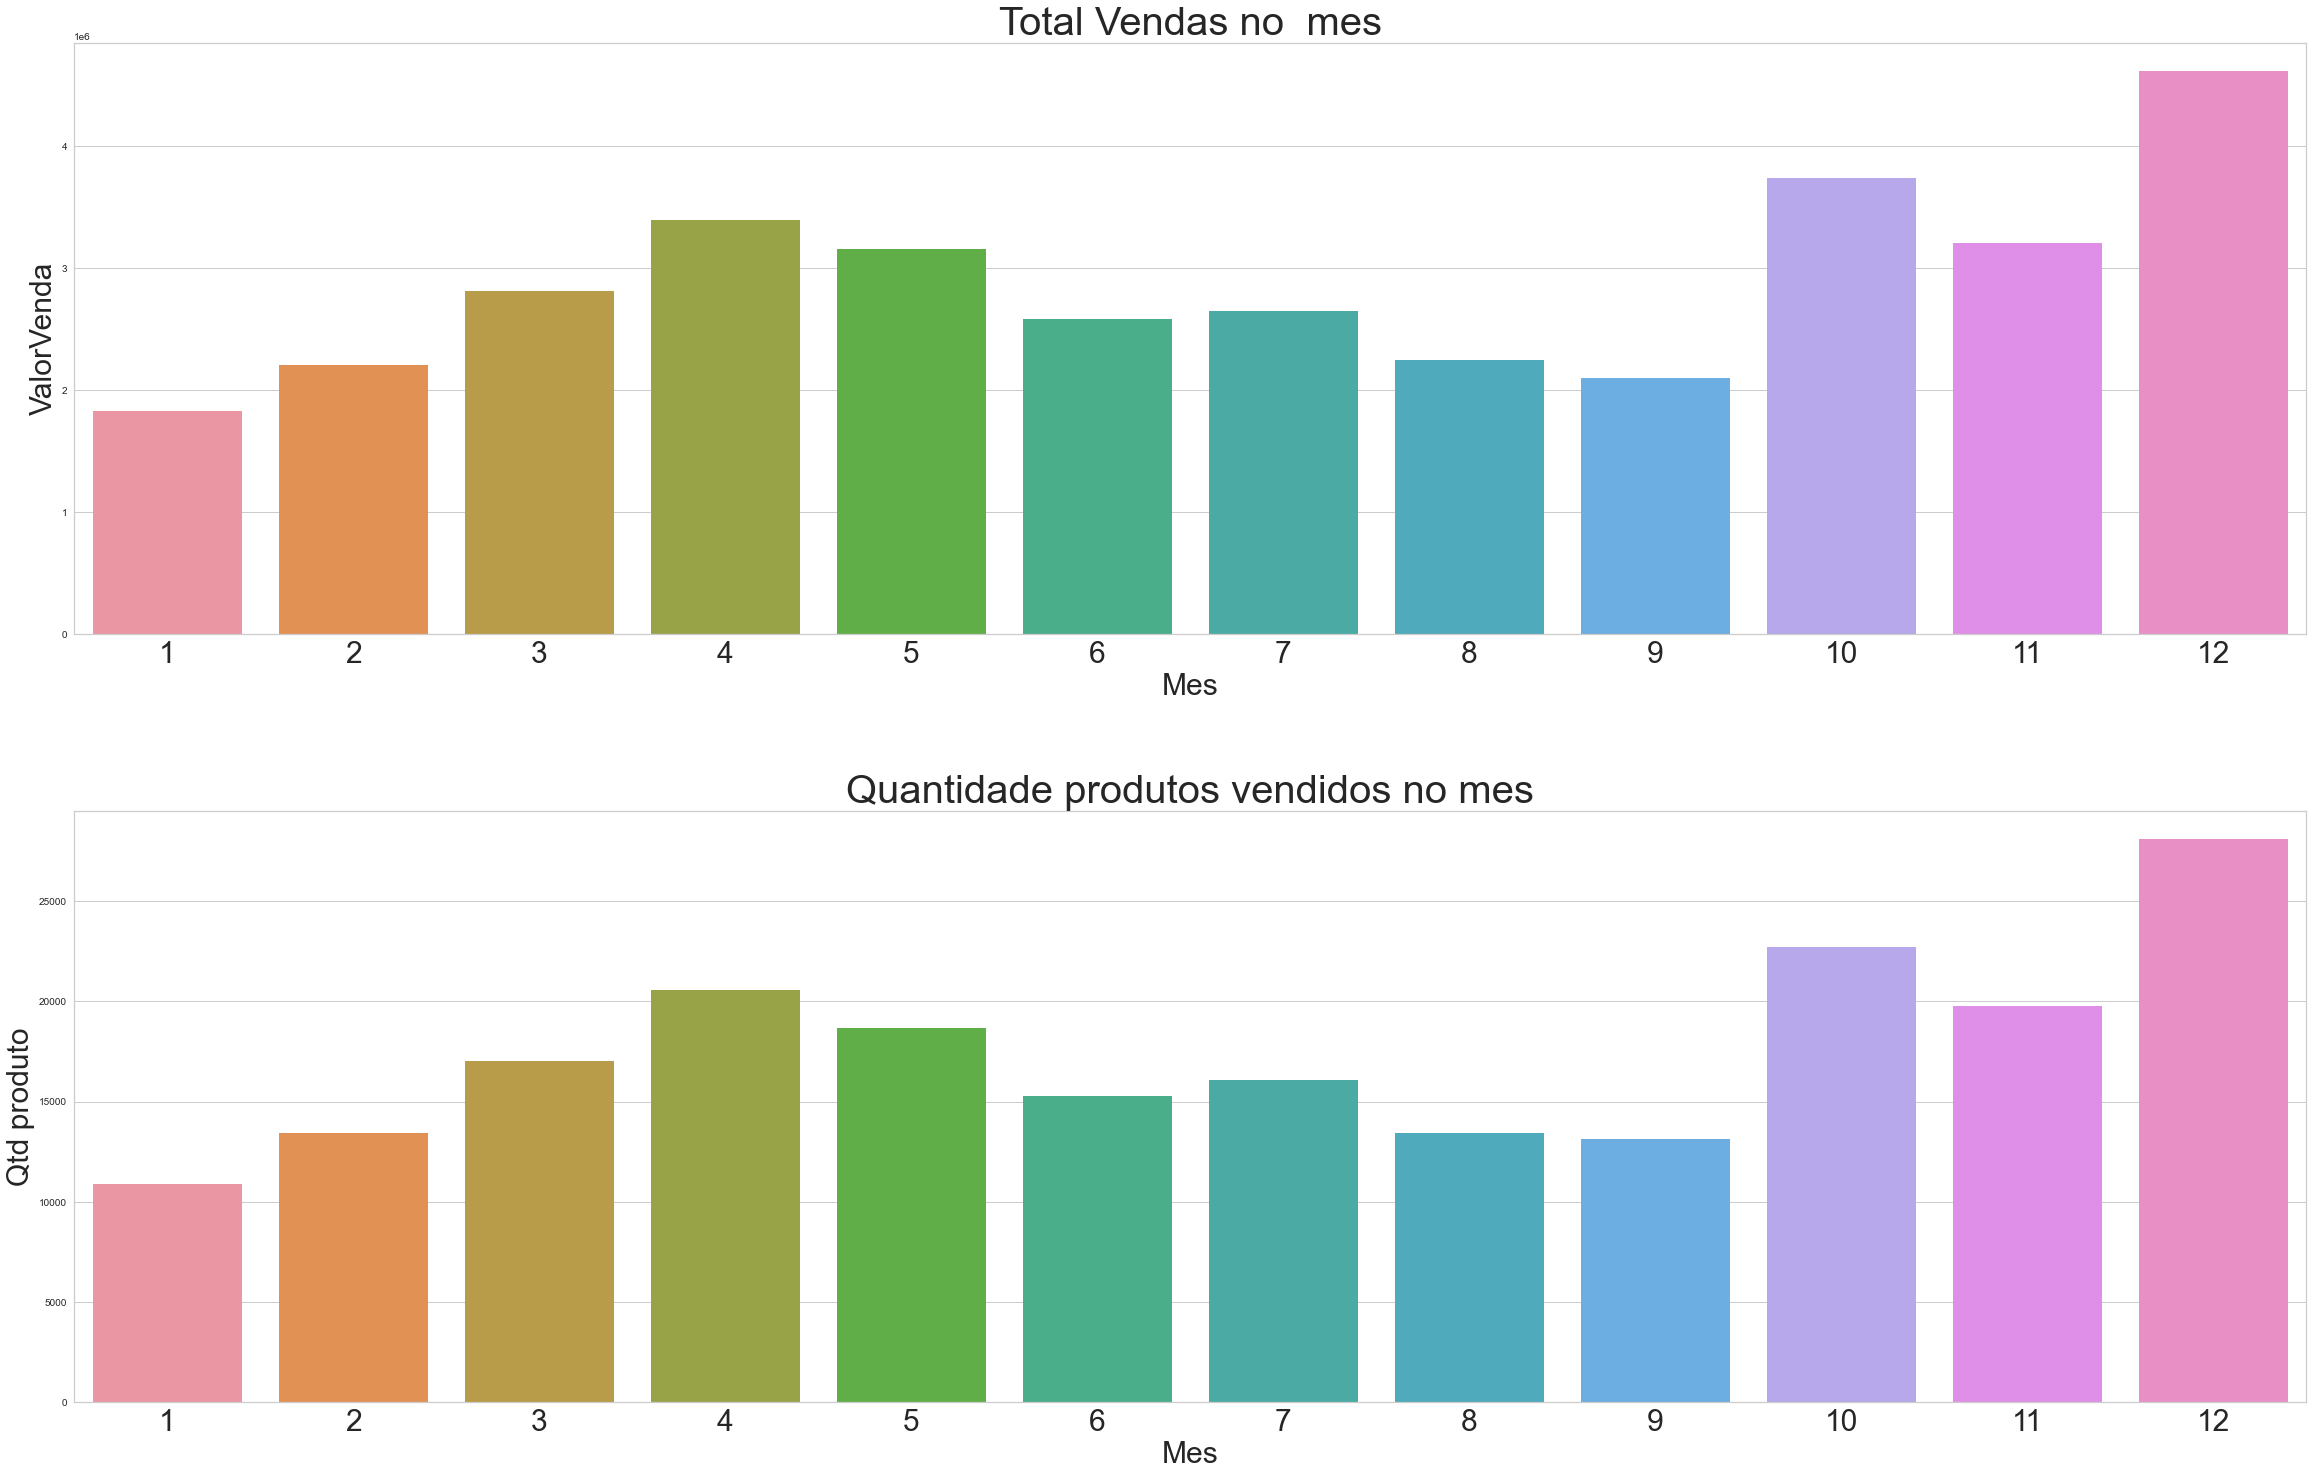

In [15]:
fig, axes = plt.subplots(2, 1, figsize = (40,25))
fig.subplots_adjust(hspace=.3)

sns.barplot(x='Mes', y='ValorVenda', data=MelhorMes, ax=axes[0])
axes[0].set_xlabel(axes[0].get_xlabel(), size=30)
axes[0].set_ylabel(axes[0].get_ylabel(), size=30)
axes[0].set_xticklabels(axes[0].get_xticklabels(), size=30)

axes[0].set_title('Total Vendas no  mes', size= 40)



sns.barplot(x='Mes', y='Qtd produto', data=MelhorMes, ax=axes[1])
axes[1].set_xlabel(axes[1].get_xlabel(), size=30)
axes[1].set_ylabel(axes[1].get_ylabel(), size=30)
axes[1].set_xticklabels(axes[1].get_xticklabels(), size=30)

axes[1].set_title('Quantidade produtos vendidos no mes', size= 40)


#Quais foram os produto mais vendidos?

In [16]:
Produtos = VendasConsolidado.groupby('Product')
QuantidadesProdutos = Produtos.sum()['Qtd produto']
QuantidadesProdutos.nlargest(5)

Product
AAA Batteries (4-pack)      31017
AA Batteries (4-pack)       27635
USB-C Charging Cable        23975
Lightning Charging Cable    23217
Wired Headphones            20557
Name: Qtd produto, dtype: int32

Os melhores meses, tanto em valores de venda quanto quantidades vendidas foram os meses 10,11 e 12. A melhor conclusao seria a proximidade do Natal bem como outros feriados de fim de ano.

#### Quais os produtos TOP5 em precos?

In [17]:
Produtos = VendasConsolidado.groupby('Product')
PrecosProdutos = Produtos.mean()['Preco unitario']
PrecosProdutos.nlargest(5)

Product
Macbook Pro Laptop    1700.00
ThinkPad Laptop        999.99
iPhone                 700.00
Google Phone           600.00
LG Dryer               600.00
Name: Preco unitario, dtype: float64

#### Quais sao as cidades que tiveram maior volume em vendas?

In [18]:
Cidades = VendasConsolidado.groupby('Cidade')
CidadesVendas = Cidades.mean()['ValorVenda']
CidadesVendas.nlargest(5)

Cidade
 Atlanta          187.856903
 New York City    187.502711
 Dallas           186.772969
 Seattle          186.516120
 Portland         186.160498
Name: ValorVenda, dtype: float64

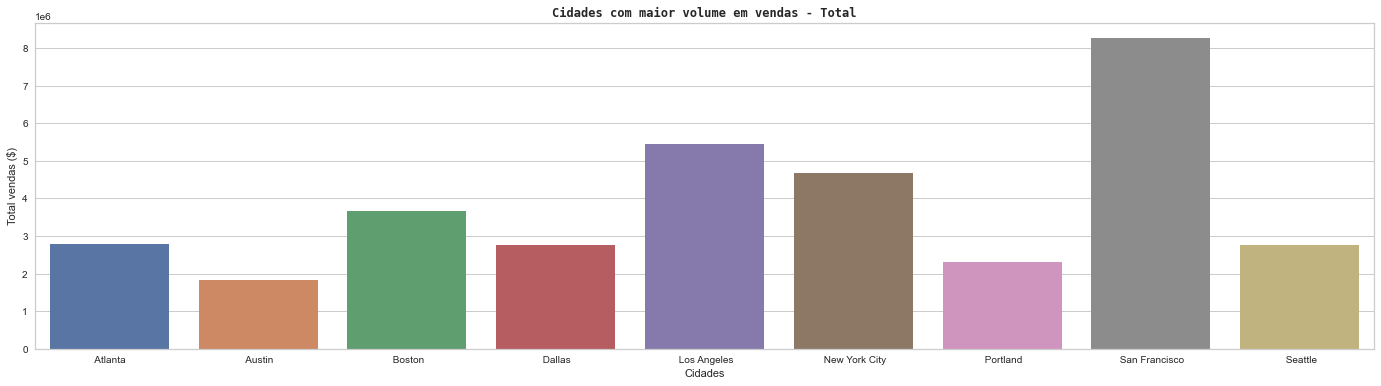

In [19]:
CidadesMaiorVendas = VendasConsolidado.groupby('Cidade').sum().astype('int')

plt.figure(figsize=(24, 6)) 

sns.barplot(
    x=CidadesMaiorVendas.index, 
    y=CidadesMaiorVendas['ValorVenda'], 
    data=CidadesMaiorVendas, palette='deep')
plt.title(
    'Cidades com maior volume em vendas - Total', 
    fontname='monospace', weight='bold')
plt.xlabel('Cidades')
plt.ylabel('Total vendas ($)');

In [20]:
#Sao Francisco,Los Angeles e NYCity sao as cidades campeas em vendas 

## Cluster - agrupamento de clientes 

Os agrupamentos de clientes serao realizados com base em 3 caracteristicas:
F - Frequencia com que os clientes fazem suas compras;
R - Numero de dias desde a ultima compra realizada;
M - Montante comprado 

Os clientes serao analisados apartir dos enderecos residenciais

In [21]:
VendasConsolidado.head()

,Order ID,Product,Order Date,Purchase Address,Qtd produto,Preco unitario,ValorVenda,Ano,Mes,Dia,Cidade,Rua,Estado
0,141234,iPhone,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",1,700.00,700.00,2019,1,22,Boston,944 Walnut St,MA
1,141235,Lightning Charging Cable,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",1,14.95,14.95,2019,1,28,Portland,185 Maple St,OR
2,141236,Wired Headphones,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",2,11.99,23.98,2019,1,17,San Francisco,538 Adams St,CA
3,141237,27in FHD Monitor,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",1,149.99,149.99,2019,1,5,Los Angeles,738 10th St,CA
4,141238,Wired Headphones,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",1,11.99,11.99,2019,1,25,Austin,387 10th St,TX


In [22]:
# Fazer uma copia de seguranca dos dados 
VendasConsolidado_copy = VendasConsolidado.copy()

In [23]:
#Visualizar endereco consumidor e o total gasto
#O endereco consumidor sera o novo ID consumidor 
M = VendasConsolidado_copy.groupby('Purchase Address')['ValorVenda'].sum()
M = M.reset_index()
M.head()

,Purchase Address,ValorVenda
0,"1 11th St, Atlanta, GA 30301",11.95
1,"1 11th St, Los Angeles, CA 90001",1700.00
2,"1 11th St, San Francisco, CA 94016",700.00
3,"1 12th St, Los Angeles, CA 90001",150.00
4,"1 12th St, New York City, NY 10001",11.99


In [24]:
#Visualizar endereco consumidor e a frequencia de compra

F = VendasConsolidado_copy.groupby('Purchase Address')['Qtd produto'].count()
F = F.reset_index()
F.columns = ['Purchase Address', 'Frequencia']
F.head(20)

,Purchase Address,Frequencia
0,"1 11th St, Atlanta, GA 30301",1
1,"1 11th St, Los Angeles, CA 90001",1
2,"1 11th St, San Francisco, CA 94016",1
3,"1 12th St, Los Angeles, CA 90001",1
4,"1 12th St, New York City, NY 10001",1
5,"1 12th St, San Francisco, CA 94016",2
6,"1 13th St, San Francisco, CA 94016",1
7,"1 14th St, New York City, NY 10001",2
8,"1 14th St, Portland, OR 97035",2
9,"1 14th St, San Francisco, CA 94016",1


In [25]:
#Fazer um merge inicial dos dois Data frames acima:

Consolidado = pd.merge(M, F, on='Purchase Address', how='inner')
Consolidado.head()

,Purchase Address,ValorVenda,Frequencia
0,"1 11th St, Atlanta, GA 30301",11.95,1
1,"1 11th St, Los Angeles, CA 90001",1700.00,1
2,"1 11th St, San Francisco, CA 94016",700.00,1
3,"1 12th St, Los Angeles, CA 90001",150.00,1
4,"1 12th St, New York City, NY 10001",11.99,1


In [26]:
# Para avaliar qual a ultima data de compra de cada cliente, tem que saber primeiro qual a ultima data conhecida na planilha
ultima_data = max(VendasConsolidado_copy['Order Date'])
ultima_data

Timestamp('2020-01-01 05:13:00')

In [27]:
#Determinar a diferenca entre as datas de transacao e a ultima data na planilha

VendasConsolidado_copy['Diff'] = ultima_data - VendasConsolidado_copy['Order Date']
VendasConsolidado_copy.head()

,Order ID,Product,Order Date,Purchase Address,Qtd produto,Preco unitario,ValorVenda,Ano,Mes,Dia,Cidade,Rua,Estado,Diff
0,141234,iPhone,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",1,700.00,700.00,2019,1,22,Boston,944 Walnut St,MA,343 days 07:48:00
1,141235,Lightning Charging Cable,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",1,14.95,14.95,2019,1,28,Portland,185 Maple St,OR,337 days 14:58:00
2,141236,Wired Headphones,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",2,11.99,23.98,2019,1,17,San Francisco,538 Adams St,CA,348 days 15:40:00
3,141237,27in FHD Monitor,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",1,149.99,149.99,2019,1,5,Los Angeles,738 10th St,CA,360 days 08:40:00
4,141238,Wired Headphones,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",1,11.99,11.99,2019,1,25,Austin,387 10th St,TX,340 days 17:14:00


In [28]:
#Determinar a data da ultima compra de cada endereco de cliente 

P = VendasConsolidado_copy.groupby('Purchase Address')['Diff'].min()
P = P.reset_index()
P.head()

,Purchase Address,Diff
0,"1 11th St, Atlanta, GA 30301",292 days 21:16:00
1,"1 11th St, Los Angeles, CA 90001",71 days 10:40:00
2,"1 11th St, San Francisco, CA 94016",109 days 23:40:00
3,"1 12th St, Los Angeles, CA 90001",287 days 14:18:00
4,"1 12th St, New York City, NY 10001",66 days 16:52:00


In [29]:
#Extrair apena o numero de dias

P['Diff'] = P['Diff'].dt.days
P.head()

,Purchase Address,Diff
0,"1 11th St, Atlanta, GA 30301",292
1,"1 11th St, Los Angeles, CA 90001",71
2,"1 11th St, San Francisco, CA 94016",109
3,"1 12th St, Los Angeles, CA 90001",287
4,"1 12th St, New York City, NY 10001",66


In [30]:
# Merge de todos os 3 data frames 

Consolidado = pd.merge(Consolidado, P, on='Purchase Address', how='inner')
Consolidado.columns = ['Purchase Address', 'ValorVenda', 'Frequencia', 'Diff']
Consolidado.head()

,Purchase Address,ValorVenda,Frequencia,Diff
0,"1 11th St, Atlanta, GA 30301",11.95,1,292
1,"1 11th St, Los Angeles, CA 90001",1700.00,1,71
2,"1 11th St, San Francisco, CA 94016",700.00,1,109
3,"1 12th St, Los Angeles, CA 90001",150.00,1,287
4,"1 12th St, New York City, NY 10001",11.99,1,66


Text(0.5, 0, 'Attributes')

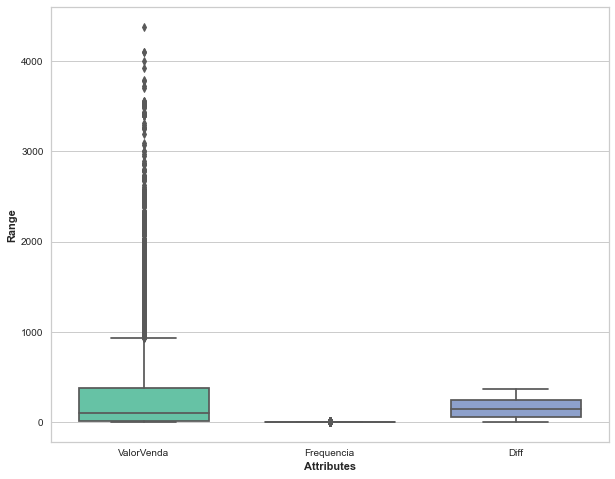

In [31]:
# Boxplot

attributes = ['ValorVenda','Frequencia','Diff']
plt.rcParams['figure.figsize'] = [10,8]
sns.boxplot(data = Consolidado[attributes], orient="v", palette="Set2" ,whis=1.5,saturation=1, width=0.7)
plt.ylabel("Range", fontweight = 'bold')
plt.xlabel("Attributes", fontweight = 'bold')

In [32]:
# Coleta uma amostra de 1% dos dados. Essa amostra reduzida sera a amostra trabalhada 
amostra1, amostra2 = train_test_split(Consolidado, train_size = .01)

In [33]:
amostra1.shape

(1407, 4)

In [34]:
amostra1.head()

,Purchase Address,ValorVenda,Frequencia,Diff
9078,"157 9th St, San Francisco, CA 94016",11.95,1,325
68577,"537 Lincoln St, San Francisco, CA 94016",750.00,2,15
127118,"911 Hickory St, Los Angeles, CA 90001",2.99,1,288
75897,"584 Walnut St, Boston, MA 02215",14.95,1,20
50861,"423 River St, San Francisco, CA 94016",14.95,1,182


In [35]:
# Fazer uma re-escala dos atributos - Normalizar 

Consolidado2 = amostra1[['ValorVenda', 'Frequencia', 'Diff']]
scaler = StandardScaler()

# fit_transform
Consolidado2_s = scaler.fit_transform(Consolidado2)
Consolidado2_s.shape



(1407, 3)

In [36]:
Consolidado2_s = pd.DataFrame(Consolidado2_s)
Consolidado2_s.columns = ['ValorVenda', 'Frequencia', 'Diff']
Consolidado2_s.head()

,ValorVenda,Frequencia,Diff
0,-0.593571,-0.520464,1.641077
1,1.273757,1.054360,-1.265277
2,-0.616241,-0.520464,1.294189
3,-0.585981,-0.520464,-1.218401
4,-0.585981,-0.520464,0.300404


In [37]:
Consolidado2_s.dtypes

ValorVenda    float64
Frequencia    float64
Diff          float64
dtype: object

In [38]:
Consolidado2.head()

,ValorVenda,Frequencia,Diff
9078,11.95,1,325
68577,750.00,2,15
127118,2.99,1,288
75897,14.95,1,20
50861,14.95,1,182


In [39]:
# Fazer uma copia de seguranca do data Frame 
Copia = Consolidado2_s.copy()

In [40]:
# Extraimos apenas os valores dos atributos.Nao importa aqui quais os seus tipos 
Atributos = Consolidado2_s.values

In [41]:
Atributos

array([[-0.59357132, -0.52046449,  1.64107691],
       [ 1.27375683,  1.05436033, -1.2652772 ],
       [-0.61624087, -0.52046449,  1.29418948],
       ...,
       [-0.59357132, -0.52046449,  1.20043612],
       [-0.24429329, -0.52046449,  1.20043612],
       [ 0.00868977,  1.05436033, -0.93714044]])

In [42]:
# Aplica redução de dimensionalidade, ou seja, coloca a amostra de dados em 2 dimensoes
amostra3 = PCA(n_components = 2).fit_transform(Atributos)

In [43]:
amostra3.shape

(1407, 2)

# Algoritmo Kmeans 

In [44]:
#visualizar a amostra que sera trabalhada: amostra3
amostra3

array([[-1.50454456,  0.78053152],
       [ 2.03513673, -0.03518267],
       [-1.33959407,  0.51277765],
       ...,
       [-1.27972918,  0.46018228],
       [-1.09435036,  0.69998314],
       [ 1.19628846, -0.66517112]])

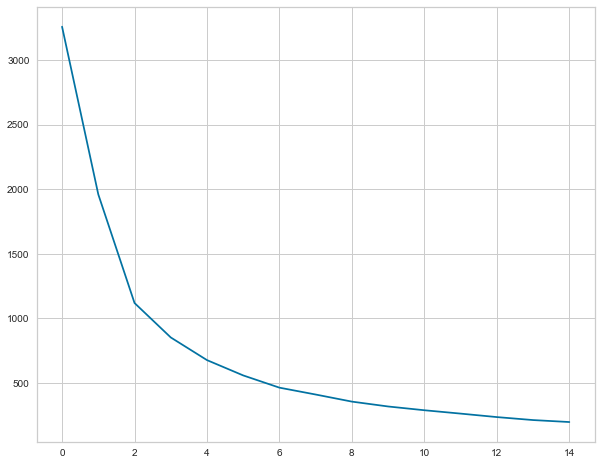

In [45]:
# k-means utilizando um numero aleatorio de clusters k
#Estou criando o modelo com Kmeans e aplicando o modelo com o fit no meu conjunto amostra3
# range de K
# Elbow-curve/SSD

lista = []
k_r = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]

for X in k_r:
    modelo = KMeans(n_clusters=X, max_iter=50)
    modelo.fit(amostra3)
    lista.append(modelo.inertia_)
    
# plot da lista
plt.plot(lista)

In [46]:
# Analise de Silhouette -usar mesmo range de K do Elbow


k_r = [8,9,10,11,12,13,14,15]

for X in k_r:
    
    modelo = KMeans(n_clusters=X, max_iter=50)
    modelo.fit(amostra3)
    labels = modelo.labels_
    silhouette = silhouette_score(amostra3, labels)
    print("para X={0}, o score de silhoette {1}".format(X,  silhouette))


 

para X=8, o score de silhoette 0.4475496932566367
para X=9, o score de silhoette 0.4534754491132862
para X=10, o score de silhoette 0.4581780955853613
para X=11, o score de silhoette 0.42798021417616633
para X=12, o score de silhoette 0.46978935937380384
para X=13, o score de silhoette 0.44186122613555784
para X=14, o score de silhoette 0.4573370321144012
para X=15, o score de silhoette 0.4588265163226249


#### Modelo com o k=12

In [47]:
k12 = KMeans(n_clusters = 12)
k12.fit(amostra3)

KMeans(n_clusters=12)

In [48]:
# Obtém os valores mínimos e máximos e organiza o shape
x_min, x_max = amostra3[:, 0].min() - 5, amostra3[:, 0].max() - 1
y_min, y_max = amostra3[:, 1].min() + 1, amostra3[:, 1].max() + 5
xx, yy = np.meshgrid(np.arange(x_min, x_max, .02), np.arange(y_min, y_max, .02))
Z = k12.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

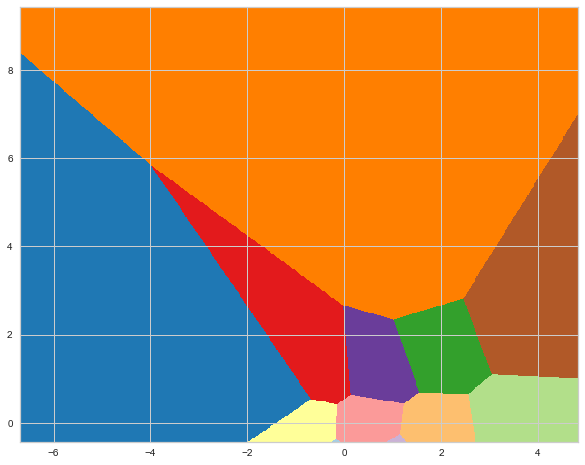

In [49]:
# Plot das áreas dos clusters
plt.figure(1)
plt.clf()
plt.imshow(Z, 
           interpolation = 'nearest',
           extent = (xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Paired,
           aspect = 'auto', 
           origin = 'lower')

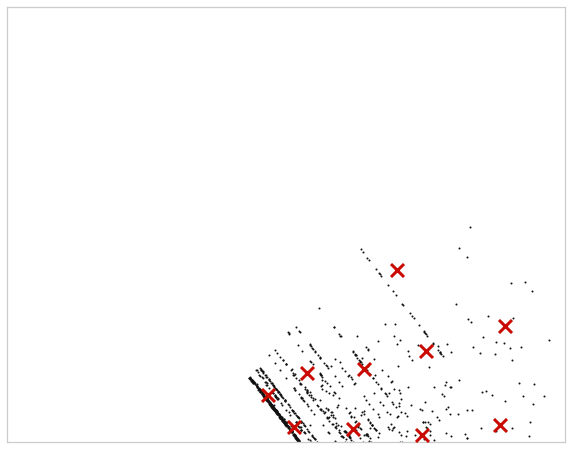

In [50]:
# Plot dos centróides
plt.plot(amostra3[:, 0], amostra3[:, 1], 'k.', markersize = 4)
centroids = k12.cluster_centers_
inert = k12.inertia_
plt.scatter(centroids[:, 0], centroids[:, 1], marker = 'x', s = 169, linewidths = 3, color = 'r', zorder = 8)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

In [51]:
amostra1.head()

,Purchase Address,ValorVenda,Frequencia,Diff
9078,"157 9th St, San Francisco, CA 94016",11.95,1,325
68577,"537 Lincoln St, San Francisco, CA 94016",750.00,2,15
127118,"911 Hickory St, Los Angeles, CA 90001",2.99,1,288
75897,"584 Walnut St, Boston, MA 02215",14.95,1,20
50861,"423 River St, San Francisco, CA 94016",14.95,1,182


In [52]:
# Lista com nomes das colunas
names = ['Purchase Address','ValorVenda', 'Frequencia', 'Diff']

In [53]:
# Cria o cluster map
cluster_map = pd.DataFrame(amostra1, columns = names)

In [54]:
cluster_map['cluster'] = k12.labels_

In [55]:
cluster_map

,Purchase Address,ValorVenda,Frequencia,Diff,cluster
9078,"157 9th St, San Francisco, CA 94016",11.95,1,325,1
68577,"537 Lincoln St, San Francisco, CA 94016",750.00,2,15,6
127118,"911 Hickory St, Los Angeles, CA 90001",2.99,1,288,1
75897,"584 Walnut St, Boston, MA 02215",14.95,1,20,0
50861,"423 River St, San Francisco, CA 94016",14.95,1,182,10
...,...,...,...,...,...
110268,"803 Pine St, Seattle, WA 98101",379.99,1,178,10
119879,"865 Johnson St, Seattle, WA 98101",11.95,1,152,10
103694,"762 1st St, Seattle, WA 98101",11.95,1,278,1
131932,"942 Jackson St, Dallas, TX 75001",150.00,1,278,1


In [56]:
# Calcula a média ValorVenda por cluster
cluster_map.groupby('cluster')['ValorVenda'].mean()

cluster
0       45.438234
1       46.471269
2      618.992500
3     1270.472564
4      294.652574
5      460.748750
6      431.423210
7     1785.623750
8      112.888962
9      777.454667
10      58.270216
11    1726.961579
Name: ValorVenda, dtype: float64

In [57]:
#Agrupa os clusters por enderecos
cluster_enderecos = cluster_map.groupby('cluster')['Purchase Address'].count()
cluster_enderecos

cluster
0     334
1     260
2      28
3      39
4     136
5      96
6      81
7      16
8     106
9      60
10    232
11     19
Name: Purchase Address, dtype: int64

In [58]:
# Identificar as cidades do cluster 0 - Para futuros trabalhos de marketing

cluster0= cluster_map[cluster_map.cluster == 0]
cluster0.head()

,Purchase Address,ValorVenda,Frequencia,Diff,cluster
75897,"584 Walnut St, Boston, MA 02215",14.95,1,20,0
22431,"241 Jackson St, Boston, MA 02215",14.95,1,36,0
74441,"575 Dogwood St, Seattle, WA 98101",5.98,1,94,0
48787,"41 Wilson St, Portland, ME 04101",23.90,1,80,0
6154,"138 Cedar St, San Francisco, CA 94016",3.84,1,3,0


In [59]:
#Copia de cluster_map
cluster0_copy = cluster0.copy()

#Extrai as cidades do cluster 2 para avaliar
cluster0_copy['Cidade'] = cluster0_copy['Purchase Address'].apply(lambda x: x.split(',')[1])
del cluster0_copy['Purchase Address']


cluster0_copy.head()

,ValorVenda,Frequencia,Diff,cluster,Cidade
75897,14.95,1,20,0,Boston
22431,14.95,1,36,0,Boston
74441,5.98,1,94,0,Seattle
48787,23.90,1,80,0,Portland
6154,3.84,1,3,0,San Francisco


In [60]:
cluster0_copy.groupby(['Cidade']).count()


,ValorVenda,Frequencia,Diff,cluster
Cidade,,,,
Atlanta,31,31,31,31
Austin,21,21,21,21
Boston,43,43,43,43
Dallas,40,40,40,40
Los Angeles,47,47,47,47
New York City,40,40,40,40
Portland,34,34,34,34
San Francisco,49,49,49,49
Seattle,29,29,29,29


# Algoritmo DBSCAN

In [61]:
# Construção do modelo
# Estes parametros eps e min_samples sao padroes 
# Primeira versão do modelo
modelo = DBSCAN(eps = 0.2, min_samples = 5, metric = 'euclidean')

In [62]:
# Fit do modelo
y_db = modelo.fit_predict(amostra3)

In [63]:
modelo.labels_

array([0, 1, 0, ..., 0, 0, 1], dtype=int64)

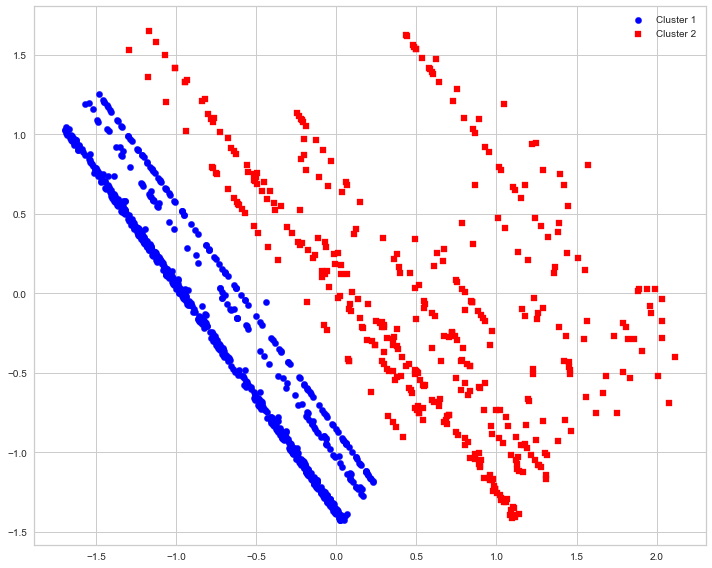

In [64]:
# Plot
plt.scatter(amostra3[y_db==0,0], amostra3[y_db==0,1], c = 'blue', marker = 'o', s = 40, label = 'Cluster 1')
plt.scatter(amostra3[y_db==1,0], amostra3[y_db==1,1], c = 'red', marker = 's', s = 40, label = 'Cluster 2')
plt.legend()
plt.tight_layout()
plt.show()

In [65]:
# Modelo Kmeans com amostra3 com K = 2
k2 = KMeans(n_clusters = 2)
k2.fit(amostra3)

KMeans(n_clusters=2)

In [66]:
k2.labels_

array([0, 1, 0, ..., 0, 0, 1])

In [67]:
amostra3.shape

(1407, 2)

In [68]:
amostra3.shape[0]

1407

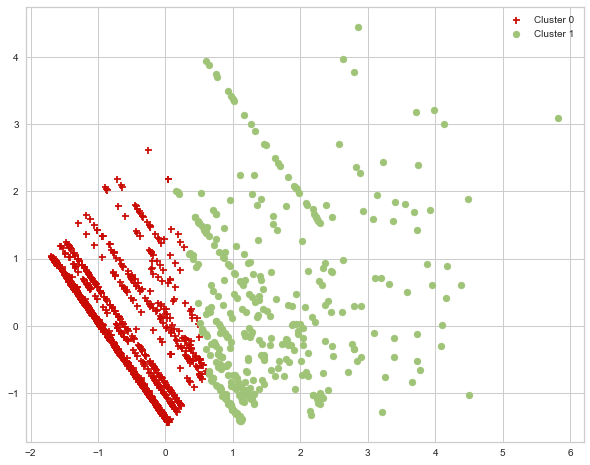

In [69]:
# Gerando "labels" para os resultados dos clusters
for i in range(0, amostra3.shape[0]):
    
    if k2.labels_[i] == 0:
        c0 = pl.scatter(amostra3[i,0],amostra3[i,1], c ='r', marker = '+')
        
    elif k2.labels_[i] == 1:
        c1 = pl.scatter(amostra3[i,0],amostra3[i,1], c ='g', marker = 'o')

        pl.legend([c0, c1],['Cluster 0', 'Cluster 1'])
       
pl.show()

# Algoritmo KMeanShift

In [70]:
# Cria o modelo


bandwidth = estimate_bandwidth(amostra3, quantile = .1, n_samples = 500)

# Cria o modelo
modelo_v1 = MeanShift(bandwidth = bandwidth, bin_seeding = True)

# Treina o modelo
modelo_v1.fit(amostra3)

MeanShift(bandwidth=0.6535935644674339, bin_seeding=True)

In [71]:

labels = modelo_v1.labels_
cluster_centers = modelo_v1.cluster_centers_
n_clusters_ = labels.max()+1

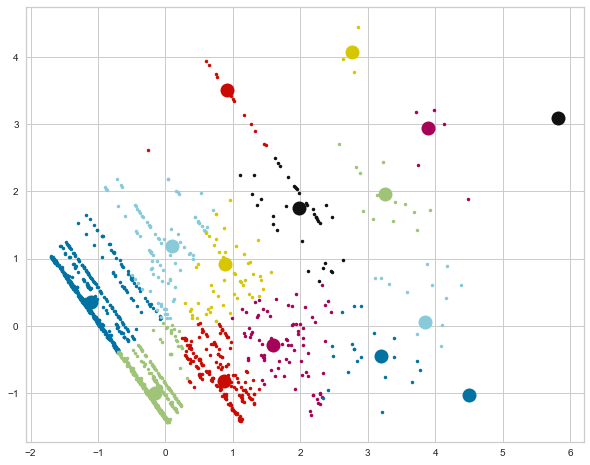

In [75]:
# Plot 
plt.figure(1)
plt.clf()
colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')

for k, col in zip(range(n_clusters_), colors):
    my_members = labels == k
    cluster_center = cluster_centers[k]
    plt.plot(amostra3[my_members, 0], amostra3[my_members, 1], col + '.')
    plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor = col, markeredgecolor = 'k', markersize = 14)

plt.show()

In [76]:
# Modelo Kmeans com amostra3 com K = 15
k15 = KMeans(n_clusters = 15)
k15.fit(amostra3)

KMeans(n_clusters=15)

In [77]:
k15.labels_

array([ 4,  1, 11, ..., 11, 11,  6])

In [78]:
x_min, x_max = amostra3[:, 0].min() - 5, amostra3[:, 0].max() - 1
y_min, y_max = amostra3[:, 1].min() + 1, amostra3[:, 1].max() + 5
xx, yy = np.meshgrid(np.arange(x_min, x_max, .02), np.arange(y_min, y_max, .02))
Z = k15.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

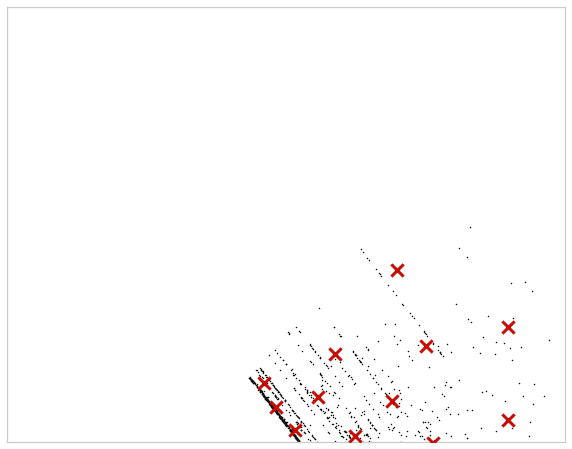

In [79]:
# Plot dos centróides
plt.plot(amostra3[:, 0], amostra3[:, 1], 'k.', markersize = 3)
centroids = k15.cluster_centers_
inert = k15.inertia_
plt.scatter(centroids[:, 0], centroids[:, 1], marker = 'x', s = 150, linewidths = 3, color = 'r', zorder = 8)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()



In [80]:
# Silhouette Score
labels = k15.labels_
silhouette_score(amostra3, labels, metric = 'euclidean')

0.4271994287429872